 # Benchmark Visualization

### Interactive Protocol

In [2]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from IPProverLinear import InteractiveLinearProver
from IPProverNaive import InteractiveNaiveProver
from IPVerifier import InteractiveVerifier
from polynomial import makeMVLinearConstructor

from typing import Dict, Tuple, List

In [3]:
def randomPolynomial(num_variables: int, field_size: int):
    num_terms = 2**num_variables
    m = makeMVLinearConstructor(num_variables, field_size)
    d: Dict[int, int] = dict()
    for _ in range(num_terms):
        d[random.randint(0, 2**num_variables - 1)] = random.randint(0, 100)

    return m(d)

In [6]:
def naiveTrial(num_variables: int, field_size: int) -> Tuple[float, float]:
    """
    :param num_variables:
    :param field_size:
    :return: prover time, verifier time (in millisecond)
    """
    p = randomPolynomial(num_variables, field_size)
    pv = InteractiveNaiveProver(p)

    t0 = time.time() * 1000
    s = pv.calculateSum([])
    t1 = time.time() * 1000
    t = t1 - t0

    v = InteractiveVerifier(random.randint(0, 0xFFFFFFFF), p, s)
    t0 = time.time() * 1000
    result, vT = pv.attemptProve(v)
    t1 = time.time() * 1000
    t += t1 - t0 - vT


    assert result
    return t, vT


In [12]:
def linearTrial(num_variables: int, field_size: int) -> Tuple[float, float]:
    """
    :param num_variables:
    :param field_size:
    :return: prover time, verifier time (in millisecond)
    """
    p = randomPolynomial(num_variables, field_size)
    pv = InteractiveLinearProver(p)

    t0 = time.time() * 1000
    A, s = pv.calculateTable()
    t1 = time.time() * 1000
    t = t1 - t0

    v = InteractiveVerifier(random.randint(0, 0xFFFFFFFF), p, s)
    t0 = time.time() * 1000
    vT = pv.attemptProve(A, v)
    t1 = time.time() * 1000
    t += t1 - t0 - vT


    assert v.convinced
    return t, vT

In [24]:
def experiment() -> Tuple[List[int], List[int], List[int], List[int]]:
    SIZE = 745765749931
    num_variables = [7,8,9,10,11,12]
    prover_naive_time = []
    prover_linear_time = []
    verifier_time = []

    for n in num_variables:
        nT, _ = naiveTrial(n, SIZE)
        lT, vT = linearTrial(n, SIZE)
        prover_naive_time.append(nT)
        prover_linear_time.append(lT)
        verifier_time.append(vT)

    return num_variables, prover_naive_time, prover_linear_time, verifier_time

In [25]:


nVs, nTs, lTs, vTs= experiment()

In [33]:

def draw(nVs: List[int], nTs: List[int], lTs: List[int], vTs: List[int]):
    plt.figure(figsize=(4,4))
    plt.suptitle("Running time(ms) for naive prover, linear prover, and verifier. ")
    plt.plot(nVs, vTs, color='orange', label="verifier")
    plt.plot(nVs, nTs, color='black', label='naive prover')
    plt.plot(nVs, lTs, color='blue', label='linear prover')
    plt.show()

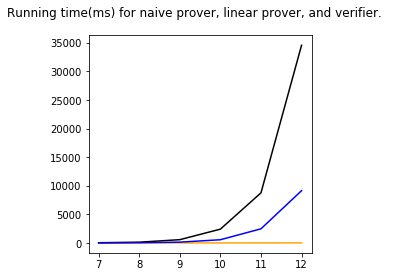

In [34]:
draw(nVs, nTs, lTs, vTs)

## Non-interactive protocol

In [4]:
from FSProver import generateTheoremAndProof
from FSVerifier import verifyProof
from IPython.display import display, Markdown

In [5]:
def experiment_offline() -> Tuple[List[int], List[int], List[int]]:
    SIZE = 745765749931
    num_variables = [7,8,9,10,11,12,13,14]
    prover_time = []
    verifier_time = []

    for n in num_variables:
        display(Markdown(f"<b>Number of Variables:</b> `{n}`\n"))
        p = randomPolynomial(n, SIZE)
        t0 = time.time()
        thm, pf = generateTheoremAndProof(p)
        t1 = time.time()
        display(Markdown(f"<b>Prover</b> takes time `{round((t1-t0)*1000)}` ms\n"))
        prover_time.append((t1 - t0) * 1000)

        t0 = time.time()
        assert verifyProof(thm, pf)
        t1 = time.time()
        display(Markdown(f"<b>Verifier</b> takes time `{round((t1-t0)*1000)}` ms<br><br>"))
        verifier_time.append((t1 - t0) * 1000)

    return num_variables, prover_time, verifier_time

result = experiment_offline()

<b>Number of Variables:</b> `7`


<b>Prover</b> takes time `22` ms


<b>Verifier</b> takes time `0` ms<br><br>

<b>Number of Variables:</b> `8`


<b>Prover</b> takes time `50` ms


<b>Verifier</b> takes time `1` ms<br><br>

<b>Number of Variables:</b> `9`


<b>Prover</b> takes time `166` ms


<b>Verifier</b> takes time `2` ms<br><br>

<b>Number of Variables:</b> `10`


<b>Prover</b> takes time `720` ms


<b>Verifier</b> takes time `3` ms<br><br>

<b>Number of Variables:</b> `11`


<b>Prover</b> takes time `2447` ms


<b>Verifier</b> takes time `7` ms<br><br>

<b>Number of Variables:</b> `12`


<b>Prover</b> takes time `9709` ms


<b>Verifier</b> takes time `11` ms<br><br>

<b>Number of Variables:</b> `13`


KeyboardInterrupt: 

In [22]:
def draw_offline(nVs: List[int], lTs: List[int], vTs: List[int]):
    plt.figure(figsize=(4,4))
    plt.suptitle("Running time(ms) for offline prover and verifier. ")
    plt.plot(nVs, vTs, color='orange', label="verifier")
    plt.plot(nVs, lTs, color='blue', label='linear prover')
    plt.show()

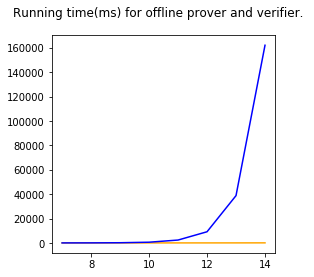

In [23]:
draw_offline(*result)

